<a href="https://colab.research.google.com/github/John-G-Thomas/DS-Unit-3-Sprint-2-SQL-and-Databases/blob/master/module4-Deploy/LS_DS17_424_Deploy_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 4, Sprint 2, Module 4*

---

# Neural Network Frameworks (Prepare)

## Learning Objectives
* <a href="#p1">Part 1</a>: Implement Regularization Strategies
* <a href="#p2">Part 2</a>: Deploy a Keras Model
* <a href="#p3">Part 3</a>: Write a Custom Callback Function (Optional)

Today's class will also focus heavily on Callback objects. We will use a variety of callbacks to monitor and manipulate our models based on data that our model produces at the end of an epoch.

> A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). -- [Keras Documentation](https://keras.io/api/callbacks/)

# Regularization Strategies (Learn)

## Overview

Neural Networks are highly parameterized models and can be easily overfit to the training data. The most salient way to combat this problem is with regularization strategies.  

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Regularization.svg/1920px-Regularization.svg.png)

There are four common ways of regularization in neural networks which we cover briefly. Here's a quick summary of how to apply them: 

1. Always use EarlyStopping. This strategy will prevent your weights from being updated well past the point of their peak usefulness.
2. Use EarlyStopping, Weight Decay and Dropout
3. Use EarlyStopping, Weight Constraint and Dropout
4. Also think about the architecture (number of layers, neurons) - determines number of parameters, which is the basis of overfitting - but even "small" neural nets can be complicated and overfit!

Weight Decay and Weigh Constraint accomplish similar purposes - preventing over fitting the parameters by regularizing the values. The mechanics are just slightly different. That's why you would not necessary want to apply them together.

## Follow Along

### Early Stopping

In [ ]:
%load_ext tensorboard

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


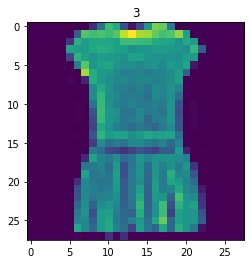

In [ ]:
import matplotlib.pyplot as plt

plt.title(y_train[3])
plt.imshow(X_train[3]);

In [ ]:
X_train, X_test = X_train / 255., X_test / 255.

In [ ]:
28 * 28  # Same feature size as MNIST

784

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import ReLU
import tensorflow as tf
import os

logdir = os.path.join("logs", "EarlyStopping-Loss")

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),  # Treats as 784x1
    Dense(128),
    ReLU(negative_slope=.01),
    Dense(128),
    ReLU(negative_slope=.01),
    Dense(128),
    ReLU(negative_slope=.01),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Epoch 1/99
   1/1875 [..............................] - ETA: 0s - loss: 2.3222 - accuracy: 0.0938WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4772 - accuracy: 0.8264 - val_loss: 0.4049 - val_accuracy: 0.8542
Epoch 2/99
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3530 - accuracy: 0.8712 - val_loss: 0.3626 - val_accuracy: 0.8705
Epoch 3/99
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3232 - accuracy: 0.8810 - val_loss: 0.3439 - val_accuracy: 0.8739
Epoch 4/99
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2999 - accuracy: 0.8884 - val_loss: 0.3391 - val_accuracy: 0.8770
Epoch 5/99
1875/1875 [==============================] - 7s 4

### Weight Decay

```python
Dense(64, input_dim=64,
            kernel_regularizer=regularizers.l2(0.01),
            activity_regularizer=regularizers.l1(0.01)))
```

In [ ]:
from tensorflow.keras import regularizers

logdir = os.path.join("logs", "EarlyStopping+L2_WeightDecay")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    ReLU(negative_slope=.01),
    Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    ReLU(negative_slope=.01),
    Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    ReLU(negative_slope=.01),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Epoch 1/99
1875/1875 [==============================] - 38s 20ms/step - loss: 1.3285 - accuracy: 0.7711 - val_loss: 0.7866 - val_accuracy: 0.7929
Epoch 2/99
1875/1875 [==============================] - 38s 20ms/step - loss: 0.7080 - accuracy: 0.8140 - val_loss: 0.7133 - val_accuracy: 0.8133
Epoch 3/99
1875/1875 [==============================] - 37s 20ms/step - loss: 0.6513 - accuracy: 0.8271 - val_loss: 0.6695 - val_accuracy: 0.8193
Epoch 4/99
1875/1875 [==============================] - 37s 20ms/step - loss: 0.6232 - accuracy: 0.8348 - val_loss: 0.6118 - val_accuracy: 0.8383
Epoch 5/99
1875/1875 [==============================] - 37s 20ms/step - loss: 0.6262 - accuracy: 0.8385 - val_loss: 0.6249 - val_accuracy: 0.8274
Epoch 6/99
1875/1875 [==============================] - 37s 20ms/step - loss: 0.5992 - accuracy: 0.8393 - val_loss: 1.4221 - val_accuracy: 0.8022
Epoch 7/99
1875/1875 [==============================] - 38s 20ms/step - loss: 0.6106 - accuracy: 0.8411 - val_loss: 0.6147 -

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
re_lu_6 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_7 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
re_lu_8 (ReLU)               (None, 512)              

In [ ]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

### Weight Constraint

```python
tf.keras.constraints.MaxNorm(
    max_value=2, axis=0
)
```

In [ ]:
from tensorflow.keras.constraints import MaxNorm

wc = MaxNorm(max_value=2)

logdir = os.path.join("logs", "EarlyStopping+WeightConstraint")

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Epoch 1/99
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4696 - accuracy: 0.8282 - val_loss: 0.4013 - val_accuracy: 0.8521
Epoch 2/99
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3519 - accuracy: 0.8718 - val_loss: 0.3834 - val_accuracy: 0.8634
Epoch 3/99
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3234 - accuracy: 0.8805 - val_loss: 0.3729 - val_accuracy: 0.8625
Epoch 4/99
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3084 - accuracy: 0.8839 - val_loss: 0.3509 - val_accuracy: 0.8752
Epoch 5/99
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3001 - accuracy: 0.8895 - val_loss: 0.3555 - val_accuracy: 0.8752
Epoch 6/99
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2905 - accuracy: 0.8911 - val_loss: 0.3274 - val_accuracy: 0.8834
Epoch 7/99
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2827 - accuracy: 0.8932 - val_loss: 0.3833 -

### Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

from tensorflow.keras.constraints import MaxNorm

wc = MaxNorm(max_value=2)

logdir = os.path.join("logs", "EarlyStopping+WeightConstraint+Dropout")

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dropout(.2),
    Dense(256, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dropout(.2),
    Dense(256, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dropout(.2),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Epoch 1/99
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5304 - accuracy: 0.8086 - val_loss: 0.4292 - val_accuracy: 0.8452
Epoch 2/99
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4056 - accuracy: 0.8515 - val_loss: 0.4088 - val_accuracy: 0.8538
Epoch 3/99
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3785 - accuracy: 0.8622 - val_loss: 0.3968 - val_accuracy: 0.8599
Epoch 4/99
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3701 - accuracy: 0.8658 - val_loss: 0.3854 - val_accuracy: 0.8672
Epoch 5/99
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3597 - accuracy: 0.8697 - val_loss: 0.3679 - val_accuracy: 0.8662
Epoch 6/99
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3551 - accuracy: 0.8687 - val_loss: 0.3558 - val_accuracy: 0.8671
Epoch 7/99
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3518 - accuracy: 0.8701 - val_loss: 0.3685 - val_ac

In [ ]:
%tensorboard --logdir logs

## Challenge

You will apply regularization strategies inside your neural network today, as you try to avoid overfitting it. 

---

# Deploy (Learn)

## Overview

You've built a dope image classification model, but it's just sitting your Jupyter Notebook. What now? Well you deploy to some down stream application. TensorFlow supports three ways of deploying it's models: 

- In-Browser with TensorFlow.js
- API with TensorFlow Serving (TFX) or another Framework
- On-Device with TensorFlow Lite

You are already familiar with deploying a model as an API from Unit 3, so we will focus on deploying a model in browser. Both methods rely on the same core idea: save your weights and architecture information, load those parameters into application, and perform inference. 



## Follow Along

### Train Your Model

In [ ]:
import tensorflow as tf

cpoint = tf.keras.callbacks.ModelCheckpoint("weights_best.h5",
                                            verbose=1, 
                                            save_weights_only=True)

def create_model():
  model = tf.keras.Sequential([
      Flatten(input_shape=(28,28)),
      Dense(128),
      ReLU(negative_slope=.01),
      Dense(128),
      ReLU(negative_slope=.01),
      Dense(128),
      ReLU(negative_slope=.01),
      Dense(10, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
                metrics=['accuracy'])

  return model

model = create_model()

model.fit(X_train, y_train, epochs=2, 
          validation_data=(X_test,y_test),
          verbose=2,
          callbacks=[cpoint])

Epoch 1/2

Epoch 00001: saving model to weights_best.h5
1875/1875 - 7s - loss: 0.4755 - accuracy: 0.8271 - val_loss: 0.4480 - val_accuracy: 0.8377
Epoch 2/2

Epoch 00002: saving model to weights_best.h5
1875/1875 - 7s - loss: 0.3519 - accuracy: 0.8697 - val_loss: 0.3781 - val_accuracy: 0.8651


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.8651


[0.37806665897369385, 0.8651000261306763]

### Load Exported Model

In [ ]:
m = create_model()  # Start with same architecture
m.load_weights('./weights_best.h5')  # Load instead of train
m.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               100480    
_________________________________________________________________
re_lu_21 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_22 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_23 (ReLU)              (None, 128)              

In [ ]:
m.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.8651


[0.37806665897369385, 0.8651000261306763]

In [ ]:
# Save entire model
# i.e. both weights and architecture
# Create and train a new model instance.
model = create_model()
model.fit(X_train, y_train, epochs=5)

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4682 - accuracy: 0.8295
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3516 - accuracy: 0.8712
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3194 - accuracy: 0.8826
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2973 - accuracy: 0.8898
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2816 - accuracy: 0.8960
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8700


[0.35136768221855164, 0.8700000047683716]

In [ ]:
# Load it back fresh, including weights and architecture

new_model = tf.keras.models.load_model('saved_model/my_model')
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               100480    
_________________________________________________________________
re_lu_24 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_25 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_26 (ReLU)              (None, 128)              

In [ ]:
!ls -alh  # Half a meg for a model

total 572K
drwxr-xr-x 1 root root 4.0K Sep 10 17:46 .
drwxr-xr-x 1 root root 4.0K Sep 10 16:41 ..
drwxr-xr-x 1 root root 4.0K Aug 31 16:13 .config
drwxr-xr-x 6 root root 4.0K Sep 10 17:26 logs
drwxr-xr-x 1 root root 4.0K Aug 27 16:39 sample_data
drwxr-xr-x 3 root root 4.0K Sep 10 17:46 saved_model
-rw-r--r-- 1 root root 547K Sep 10 17:41 weights_best.h5


In [ ]:
# One way to reduce size - reduce architecture! (# of layers, neurons)

In [ ]:
float(3.1415926535897932384626)  # It loses some numbers!

3.141592653589793

In [ ]:
# Floating point numbers are stored at a certain precision
# in number of bits - e.g. 16, 32, etc.
# Above that precision, numbers are rounded off

# When you train, you want full precision! Training is sensitive...
# But at the very end, it may be okay to reduce

# Another way to reduce size - go from e.g. 32 bit numbers
# to 16 or 8 bit numbers
# Basically truncate/round numbers
float(3.14159)

3.14159

In [ ]:
# Keep same number of parameters, but less info/detail per parameter

### Move Weights to Web Application

Not all models are small enough to work well in-browser. Many neural networks are deploy as micro-service APIs. Micro-service APIs are the architecture you studied during Unit 3. 

In [ ]:
# Stretch - https://www.tensorflow.org/js

## Challenge

You will be expected to be able to export your model weights and architecutre on the assignment.

# Custom Callbacks (Learn)

## Overview

Custom callbacks all you to access data at any point during the training: on batch end, on epoch end, on epoch start, on batch start. Our use case today is a simple one. Let's stop training once we reach a benchmark accuracy.

## Follow Along

## Challenge

Experiment with improving our custom callback function. 